In [ ]:
#importing Pandas and Numpy and datasets 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Reading the csv file into a Pandas DataFrame
test = datasets.load_iris()
data = pd.DataFrame(data=np.c_[test['data'], test['target']], columns=test['feature_names'] + ['target'])

In [ ]:
#as We konw that we have three types of roses(rose 0 , rose 1 , rose 2)
data.target.unique()

array([0., 1., 2.])

In [ ]:
#in order to simplify the process we will only select two roses(rose 0 , rose1)
data = data[data['target'].isin([0,1])]

In [ ]:
data.head(11)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [ ]:
data.target.unique()

array([0., 1.])

In [ ]:
data = data[data['target'].isin([0 ,1])]

In [ ]:
#we'll see our DATA 
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [ ]:
#I just chose 2 features
data = data[['sepal width (cm)' , 'sepal length (cm)' ,  'target']]

In [ ]:
data.head(3)

,sepal width (cm),sepal length (cm),target
0,3.5,5.1,0.0
1,3.0,4.9,0.0
2,3.2,4.7,0.0


In [ ]:
#we'll see how many elements in our data
print(data.shape)

(100, 3)


# Summary 1:


1. until now , i entered the data into a notebook and we found how many target there are(rose of type 0 , rose of type 1 , rose of type 2) but i decided to take only two roses(rose of type 0 , rose of type 1) in order to get" binary classification"
2. we had 4 features in the data but i just took two features ('sepal length (cm)' , 'sepal width (cm)')
3. we have in the data 100 observations



# understand the target 

In [ ]:
#how many elements do we have
data['target'].value_counts()

1.0    50
0.0    50
Name: target, dtype: int64

# understand the features



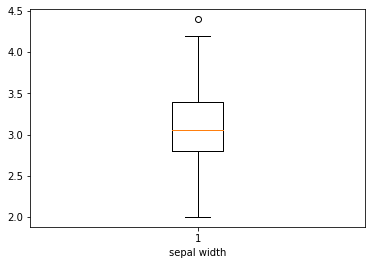

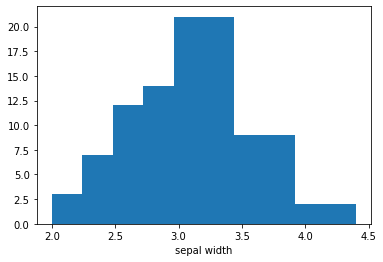

In [ ]:
#we start first with sepal width
#boxplot
plt.boxplot(data['sepal width (cm)'])
plt.xlabel('sepal width')
plt.show()

#histogram
plt.hist(data['sepal width (cm)'])
plt.xlabel('sepal width')
plt.show()

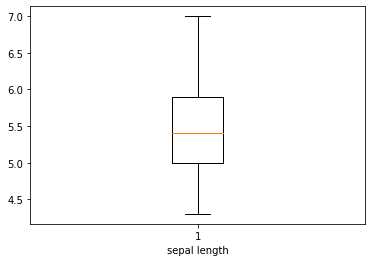

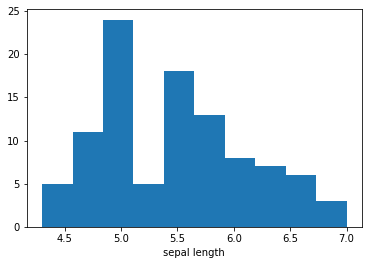

In [ ]:
# we do the same thing with sepal length
#boxplot
plt.boxplot(data['sepal length (cm)'])
plt.xlabel('sepal length')
plt.show()

#histogram
plt.hist(data['sepal length (cm)'])
plt.xlabel('sepal length')
plt.show()

## Summary 2:

* we extracted the target and we analyzed the features
* we found that the target are divided into 50 observations of rose type 0 and 50 observations of rose type 1 , That's awesome ! 
* we saw also the distrubution of the features by boxplot and histogram 
* so we can classifier between them !



## understand the relationship between the features and the target

In [ ]:
data.head(3)

,sepal width (cm),sepal length (cm),target
0,3.5,5.1,0.0
1,3.0,4.9,0.0
2,3.2,4.7,0.0


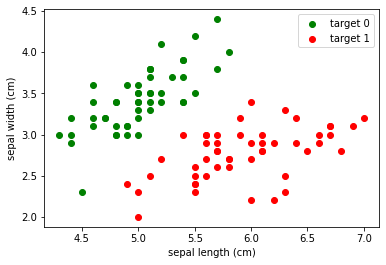

In [ ]:
#we extract everything related to the target = 0
target_0 = data[data.target == 0]
#we study 'sepal length (cm)'and 'sepal width (cm)' in order to find out the ralationship between the features and the target
plt.scatter(target_0['sepal length (cm)'], target_0['sepal width (cm)'], color ='green', label='target 0')

#we do the same thnig with target 1 
target_1 = data[data.target == 1]
plt.scatter(target_1['sepal length (cm)'], target_1['sepal width (cm)'] ,color ='red', label = 'target 1')

plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


plt.show()


## Summary 3:
 we have two features so we can draw the data in graph , the graph is called 'scatter plot' and we know that the two roses are separated
 we must draw a logistic regression for separating them !

## Randomize data

In [ ]:
data = data.sample(frac=1 , random_state= 42 )


## now we divide the data into testing and training

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test = train_test_split(data, test_size=0.2)

In [ ]:
# we have 100 observations in the data
print(data.shape)

(100, 3)


In [ ]:
# we have 80 observations in training data
print(data_train.shape)

(80, 3)


In [ ]:
# we have 20 observations in  training data
print(data_test.shape)

(20, 3)


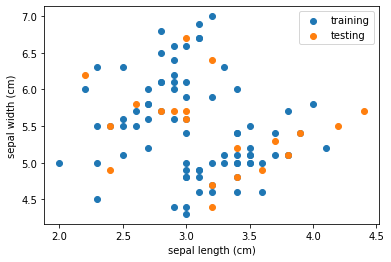

In [ ]:
# we see the data ! 
plt.scatter(data_train['sepal width (cm)'] ,data_train['sepal length (cm)'], label='training')
plt.scatter(data_test['sepal width (cm)'], data_test['sepal length (cm)'], label='testing')

plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

## Train logistic regression

In [ ]:
# the data is divided into a feature and target 
X_train = data_train[['sepal width (cm)' , 'sepal length (cm)']]
y_train = data_train['target']


X_test = data_test[['sepal width (cm)', 'sepal length (cm)']]
y_test = data_test['target']

In [ ]:
from sklearn.linear_model import LogisticRegression
# we create the object of logistic regression
logisticRegr = LogisticRegression()
# we give it the data to learn 
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## let's see what it will do ! i mean logisitic regression 

the formula of logistic regression 
 
$$p(y=1|x; \theta) = \frac{1}{1 + e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2}}$$
 
it's the same !
 
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = log(\frac{p}{1-p})$$
 
the line equation is :
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$ 
 
That is, 
 
$$x_2 = \frac{1}{\theta_2} (\theta_0 + \theta_1 x_1)$$

In [ ]:
# we see the coef (theta_0, theta_1, theta_2)
logisticRegr.coef_

array([[-2.68802339,  2.9269813 ]])

In [ ]:
# intercept is theta_0 
logisticRegr.intercept_

array([-7.61596941])

In [ ]:
theta_0 = logisticRegr.intercept_[0]
theta_1 = logisticRegr.coef_[0, 0]
theta_2 = logisticRegr.coef_[0, 1]

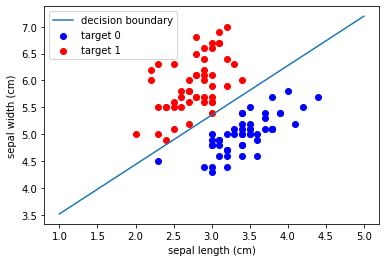

In [ ]:
# decision bondary

# we draw decision boundary 
def decision_boundary(theta_0, theta_1, theta_2, l_x):
    return 1 / theta_2 * (-theta_0 -theta_1 * l_x)

# target = 0 
target_0 = data[data.target == 0]
plt.scatter(target_0['sepal width (cm)'], target_0['sepal length (cm)'],color='blue', label='target 0')

#we do the same thing with target = 1
target_1 = data[data.target == 1]
plt.scatter(target_1['sepal width (cm)'] ,target_1['sepal length (cm)'] ,color='red', label='target 1')

# we add the decision boundary 
l_x = np.linspace(1, 5)
l_y = decision_boundary(theta_0, theta_1, theta_2, l_x)
plt.plot(l_x, l_y, label='decision boundary')

plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

## is this an excellent example ?

there are many methods to check !
1. Precision
2.Confusion matrix
3.Accuracy

## Confusion matrix

[<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg">]

__TN (True Negative)__:  I Predict target=0 and in the reality is target=0

__TP (True Positive)__:  I Predict target=1 and in the rality is target=1

__FN (False Negative)__: I Predict target=0 and in the reality is target=1

__FP (False Positive)__: I Predict target=1 and in the reality is target=0

In [ ]:
# we see the predictions
y_pred = logisticRegr.predict(X_test)

print('predictions: {}'.format(y_pred))
print('true: {}'.format(list(y_test.astype(int))))

predictions: [1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.]
true: [1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]


In [ ]:
from sklearn.metrics import confusion_matrix
# confusion matrix 
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

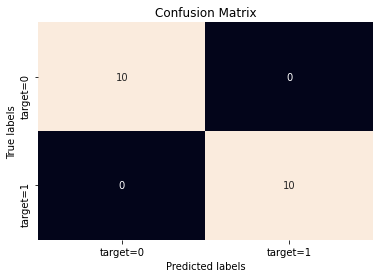

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1'])
ax.yaxis.set_ticklabels(['target=0', 'target=1'])
plt.show()


In [ ]:
# true negative 
TN = 10
# true positive 
TP = 10
# false negative 
FN = 0 
# false positive 
FP = 0 

## Precision

$$\text{Precision (%)} = \frac{TP}{TP + FP} * 100$$

In [ ]:
precision = TP / (TP + FP) * 100
print(precision, '%')

100.0 %
